# 1.0 Getting movie links for scraping

In [33]:
# Get Soup
import requests
from bs4 import BeautifulSoup
import re
import dateutil.parser
from PIL import Image
import io
from urllib.request import urlopen
import time
import calendar

##Page list 
pagelist2015 = ['http://www.boxofficemojo.com/yearly/chart/?page=1&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2015&p=.htm']
pagelist2014 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2014&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2013 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2013&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2012 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2012&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2011 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2011&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2010 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2010&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2010&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2010&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2010&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2010&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2010&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2009 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2009&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2009&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2009&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2009&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2009&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2009&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist = pagelist2015 + pagelist2014 + pagelist2013 + pagelist2012 + pagelist2011 + pagelist2010 + pagelist2009 

In [41]:
##Find movie links based on page list
movielist = []
for page in pagelist:
    url = page
    response = requests.get(url,headers={'Microsoft Edge':'Metis data science student scraping project'})
    soup = BeautifulSoup(response.text)
    for x in soup.find_all('a'):
        try:
            if "/movies/?id" in x['href']:
                movielist.append(x['href'])
            else:
                continue
        except:
            continue
            
##Translate movie links into full html addresses
htmllist = []
for x in movielist:
    htmllist.append('http://www.boxofficemojo.com'+x+'&adjust_yr=2015&p=.htm')
    
htmllist = list(set(htmllist)) ##Remove duplicates

C:\Users\kennd\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [42]:
len(htmllist)

4411

# 2.0 Scraping Script

In [43]:
## Import BeautifulSoup and scraping modules
from bs4 import BeautifulSoup
import requests
import re
#url = 'http://www.boxofficemojo.com/movies/?id=fruitvale.htm'
#response = requests.get(url,headers={'Microsoft Edge':'Metis data science student scraping project'})
#soup = BeautifulSoup(response.text)

## 2.1 Subfunctions to extract data from movie webpages

In [44]:
##Get movie title
def get_movie_title(soup):
    try:
        return soup.find('title').text.split('-')[0].split('(')[0].strip()
    except:
        return None

##Get movie domestic box office gross
def get_movie_domestic_gross(soup):
    try:
        return float(soup.find_all('b')[2].text.replace('$','').replace(',',''))/(10**6)
    except:
        return None
    
##Get movie distributor
def get_movie_distributor(soup):
    try:
        return soup.find(text=re.compile('Distributor')).findNextSibling().text.replace('/',' ').split()[0]
    except:
        return None
    
##Get movie release date
def get_movie_release_date(soup):
    try:
        datestring = soup.find(text=re.compile('Release Date')).findNextSibling().text
        date = dateutil.parser.parse(datestring)
        return date
    except:
        return None
        
##Get movie genre
def get_movie_genre(soup):
    try:
        return soup.find(text=re.compile('Genre:')).findNextSibling().text.split()[0]
    except:
        return None
    
##Get movie runtime
def get_movie_runtime(soup):
    try:
        runtime_string= soup.find(text=re.compile('Runtime')).findNextSibling().text.split()
        return float(runtime_string[0])*60 + float(runtime_string[2])
    except:
        return None

##Get movie MPAA rating
def get_movie_mpaa_rating(soup):
    try:
        return soup.find(text=re.compile('MPAA')).findNextSibling().text
    except:
        return None

##Get movie production budget
def get_movie_prod_budget(soup):
    try:
        prod_budget_string = soup.find(text=re.compile('Production Budget')).findNextSibling().text.replace('$','').replace(',','')
        if 'million' in prod_budget_string:
            return float(prod_budget_string.split()[0])
        else:
            return None
    except:
        return None

##Get movie opening weekend gross
def get_movie_weekend_gross(soup):
    if soup.find(text=re.compile('Wide\xa0Opening')):
        try:
            return float(soup.find(text=re.compile('Wide\xa0Opening')).findNext().text.replace('$','').replace(',',''))/(10**6)
        except:
            return None
    elif soup.find(text=re.compile('Opening\xa0Weekend')):
        try:
            return float(soup.find(text=re.compile('Opening\xa0Weekend')).findNext().text.replace('$','').replace(',',''))/(10**6)
        except:
            return None
    else:
        return None

##Get movie in release days
def get_movie_release_days(soup):
    try:
        return abs(float(soup.find(text=re.compile("In Release")).findNext().text.strip().split()[0]))
    except:
        return None
    

##Get movie widest # of theaters:
def get_movie_no_theaters(soup):
    try:
        return abs(float(soup.find(text=re.compile("Widest")).findNext().text.replace(',','').split()[0]))
    except:
        return None
    
def get_color(soup,i):
    try:
        imagelist = []
        for x in soup.findAll('img'):
            if x['src']:
                imagelist.append(x['src'])      
        fd = urlopen(imagelist[4])
        image_file = io.BytesIO(fd.read())
        im = Image.open(image_file)
        Rlist = []
        Glist = []
        Blist = []
        for pixel in list(im.getdata()):
            Rlist.append(pixel[0])
            Glist.append(pixel[1])
            Blist.append(pixel[2])
        AveR = sum(Rlist)/len(Rlist)
        AveG = sum(Glist)/len(Glist)
        AveB = sum(Blist)/len(Blist)
        return list([AveR,AveG,AveB])[i]
    except:
        return None

## 2.2  Combine subfunctions into one function

In [45]:
def get_movie_data(soup):
    datalist = []
    datalist.append(get_movie_title(soup))
    datalist.append(get_movie_domestic_gross(soup))
    datalist.append(get_movie_distributor(soup))
    datalist.append(get_movie_release_date(soup))
    datalist.append(get_movie_genre(soup))
    datalist.append(get_movie_runtime(soup))
    datalist.append(get_movie_mpaa_rating(soup))
    datalist.append(get_movie_prod_budget(soup))
    datalist.append(get_movie_weekend_gross(soup))
    datalist.append(get_movie_release_days(soup))
    datalist.append(get_movie_no_theaters(soup))
    datalist.append(get_color(soup,0))
    datalist.append(get_color(soup,1))
    datalist.append(get_color(soup,2))
    df.append(datalist)

## 2.3 Loop through links and combine into one data frame

In [46]:
##Set df as master list
df = []
count = 0
for link in htmllist:
    try:
        count += 1
        print(count)
        time.sleep(0.01)
        response = requests.get(link,headers={'Microsoft Edge':'Metis data science student scraping project'})
        soup = BeautifulSoup(response.text)
        get_movie_data(soup)
    except:
        print('Error')

1


C:\Users\kennd\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [50]:
import pandas as pd
DF = pd.DataFrame(df, columns = ['title','dom_gross_adj_2015','distributor','release_date','genre','runtime','rating','budget','weekend_gross','in_release_days','max_no_theaters','R','G','B'])
DF.drop_duplicates()
DF.shape

(4411, 14)

### Checkpoint 1: Pickle

##Pickle
import pickle
with open('my_data.pkl', 'wb') as picklefile:
    pickle.dump(DF, picklefile)

In [68]:
##Take out of jar
import pickle
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import datetime
import calendar
import seaborn as sns
%matplotlib inline
with open("my_data.pkl", 'rb') as picklefile: 
    DF = pickle.load(picklefile)
DF2 = DF.copy()

In [69]:
def get_month(x):
    try:
        return calendar.month_name[x.month]
    except:
        return None
    
def get_weekday(x):
    return x.isoweekday()

def get_monthday(x):
    return x.day

def get_year(x):
    return x.year

DF2["release_month"] = DF2["release_date"].apply(get_month)
DF2["release_weekday"] = DF2["release_date"].apply(get_weekday)
DF2["release_monthday"] = DF2["release_date"].apply(get_monthday)
DF2["release_year"] = DF2["release_date"].apply(get_year)

In [70]:
##Data filters this early to execute the rest of the script faster
DF2 = DF2[(DF2["release_year"] >= 2009) & (DF2["release_year"] < 2016)]
DF2 = DF2[DF2['genre'] != 'Foreign']
DF2 = DF2[DF2['dom_gross_adj_2015']<500]
DF2 = DF2.dropna()
DF2 = DF2[(DF2.dom_gross_adj_2015>1) & (DF2.budget>1)].reset_index(drop=True)

In [71]:
##Create genre density count for each movie
##Very slow but no choice but to loop through the data frame
genre_month_count_list = []
basic_month_count_list = []
budget_month_count_list = []
for current_row in range(DF2.shape[0]):
    genre_month_count = 0.0
    basic_month_count = 0.0
    budget_month_count = 0.0
    current_DF = DF2.iloc[current_row,:]
    for compare_row in range(0,DF2.shape[0]):
        compare_DF = DF2.iloc[compare_row,:]
        try: 
            time_delta = abs((current_DF.release_date -compare_DF.release_date).days)
        except:
            time_delta = 100
        if time_delta <= 30 and current_DF.title != compare_DF.title: 
            basic_month_count +=1
            if current_DF.genre == compare_DF.genre:
                genre_month_count +=1
            if compare_DF.budget >= 100:
                budget_month_count +=1          
            
    genre_month_count_list.append(genre_month_count)
    basic_month_count_list.append(basic_month_count)
    budget_month_count_list.append(budget_month_count)
    
genre_month_count_list = pd.Series(genre_month_count_list)
basic_month_count_list = pd.Series(basic_month_count_list)
budget_month_count_list = pd.Series(budget_month_count_list)

##Create density count for each movie, maybe just the number of movies, regardless of genre or budget, will affect revenues
##Very slow but no choice but to loop through the data frame
basic_month_count_list = []
basic_two_month_count_list = []
for current_row in range(DF2.shape[0]):
    month_count = 0.0
    two_month_count = 0.0
    current_DF = DF2.iloc[current_row,:]
    for compare_row in range(0,DF2.shape[0]):
        compare_DF = DF2.iloc[compare_row,:]
        try: 
            time_delta = abs((current_DF.release_date - compare_DF.release_date).days)
        except:
            time_delta = 100  
        if time_delta <= 30 and current_DF.title != compare_DF.title:
            basic_month_count +=1
        if time_delta <= 60 and current_DF.title != compare_DF.title:
            basic_two_month_count +=1
    basic_month_count_list.append(month_count)
    basic_two_month_count_list.append(two_month_count)
basic_month_count_list = pd.Series(basic_month_count_list)
basic_two_month_count_list = pd.Series(basic_two_month_count_list)

##Create budget density count for each movie
##Very slow but no choice but to loop through the data frame
budget_month_count_list = []
budget_two_month_count_list = []
for current_row in range(DF2.shape[0]):
    month_count = 0.0
    two_month_count = 0.0
    current_DF = DF2.iloc[current_row,:]
    for compare_row in range(0,DF2.shape[0]):
        compare_DF = DF2.iloc[compare_row,:]
        try: 
            time_delta = abs((current_DF.release_date - compare_DF.release_date).days)
        except:
            time_delta = 100  
        if time_delta <= 30 and compare_DF.budget >= 100 and current_DF.title != compare_DF.title:
            month_count +=1
        if time_delta <= 60 and compare_DF.budget >= 100 and current_DF.title != compare_DF.title:
            two_month_count +=1
    budget_month_count_list.append(month_count)
    budget_two_month_count_list.append(two_month_count)
budget_month_count_list = pd.Series(budget_month_count_list)
budget_two_month_count_list = pd.Series(budget_two_month_count_list)

In [72]:
DF2["month_genre_density_count"] = genre_month_count_list
DF2["month_budget_density_count"] = budget_month_count_list
DF2["month_basic_density_count"] = basic_month_count_list

### Checkpoint 2: Pickle after creating density counts

In [73]:
##Pickle checkpoint
import pickle
with open('my_data2.pkl', 'wb') as picklefile:
    pickle.dump(DF2, picklefile)

In [74]:
with open("my_data2.pkl", 'rb') as picklefile: 
    DF2 = pickle.load(picklefile)

## Further data transformations

In [75]:
DF2.release_month = DF2.release_month.astype('category')
DF2.release_weekday = DF2.release_weekday.astype('category')
DF2.release_monthday = DF2.release_monthday.astype('category')
DF2.release_year = DF2.release_year.astype('category')
DF2.distributor = DF2.distributor.astype('category') 
DF2.genre = DF2.genre.astype('category')
DF2.rating = DF2.rating.astype('category')

In [76]:
small_distributors = ['Summit','TriStar','CBS','Open','Kenn','Apparition','FilmDistrict','Roadside','Rocky','STX','Samuel','Vivendi','Well','A24','ATO','Anchor','Appartion','First','Freestyle','High','MGM','Miramax','Newmarket','Oscilloscope','Overture','Picturehouse','Quaker']
def small_distributor(x):
    if x in small_distributors:
        return "Other Distributor"
    else:
        return x

In [77]:
DF2['distributor'] = DF2['distributor'].apply(small_distributor)

In [78]:
other_genres = ['War','Western','Period','Historical','Documentary','Sports','Music','Musical','Crime','Concert']
def other_genre(x):
    if x == "Romantic":
        return "Romance"
    elif (x == 'Adventure') | (x == 'Fantasy'):
        return "Adventure/Fantasy"
    elif x in other_genres:
        return "Other Genre"    
    else:
        return x

In [79]:
DF2['genre'] = DF2['genre'].apply(other_genre)

In [80]:
DF2['theater_squared'] = np.power(DF2['max_no_theaters'],2)

### Checkpoint 3: Pickle after data transformations

In [81]:
##Pickle checkpoint
import pickle
with open('my_data3.pkl', 'wb') as picklefile:
    pickle.dump(DF2, picklefile)

In [82]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels
%matplotlib inline
with open("my_data3.pkl", 'rb') as picklefile: 
    masterDF = pickle.load(picklefile)

# Turn in operational dataset to run regressions on

In [108]:
##Create dummy variables for categorical variables
opDF = masterDF.copy()
genre_dummy = pd.get_dummies(opDF['genre'])
distributor_dummy = pd.get_dummies(opDF['distributor'])
month_dummy = pd.get_dummies(opDF['release_month'])

opDF = pd.concat([masterDF,genre_dummy,distributor_dummy,month_dummy],axis=1)

In [109]:
##Delete non-essential variables
opDF = opDF.drop(['genre','distributor','release_month','Other Genre','Other Distributor','January','title','rating','release_date','release_weekday','release_monthday','release_year','weekend_gross'],axis=1)

# 3.0 Exploratory Analysis

In [85]:
#Create copy just to be sure
DF3 = opDF.copy()

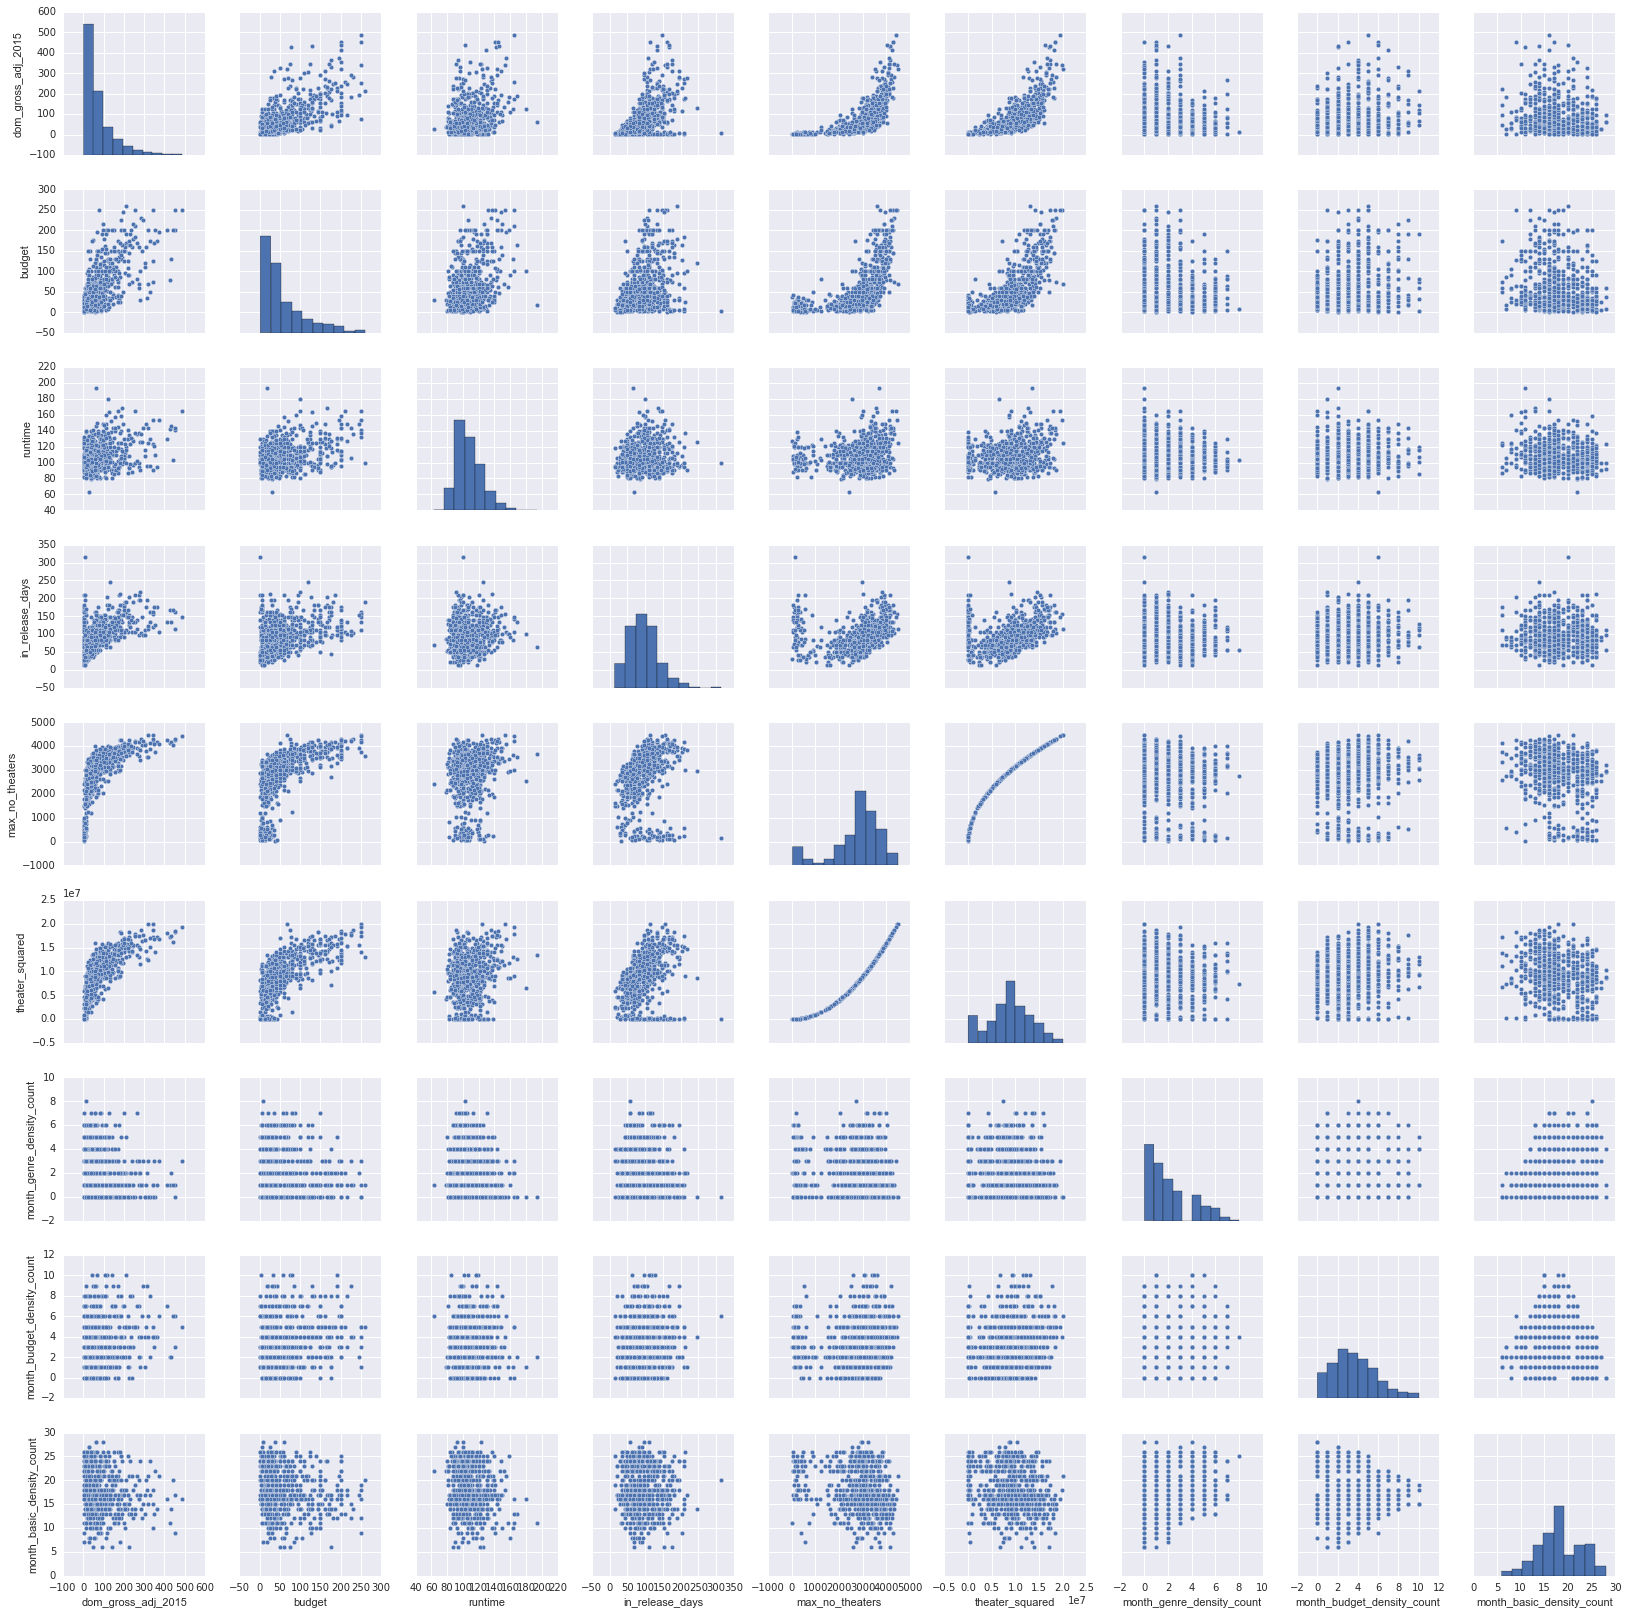

In [86]:
pairDF = DF3[['dom_gross_adj_2015','budget','runtime','in_release_days','max_no_theaters','theater_squared','month_genre_density_count','month_budget_density_count','month_basic_density_count']]
sns.pairplot(pairDF);

# 4.0 Regression Model

In [122]:
##Separate OLS DataFrame
OLSDF = opDF.copy()
OLSDF = statsmodels.tools.tools.add_constant(OLSDF,prepend=False)
OLSDF = OLSDF.drop(['month_budget_density_count','month_basic_density_count','R','G','B'],axis=1)
mask = np.random.random(OLSDF.shape[0])<=1 ##Used 100% of dataset since my interest is in the coefficient not prediction
OLSDF_train = OLSDF[mask]
OLSDF_test = OLSDF[~mask]

In [123]:
OLSDF_train_Y = OLSDF_train.iloc[:,0]
OLSDF_train_X = OLSDF_train.iloc[:,1:]

In [124]:
##Including everything to compare with elastic net
lm = smf.OLS(OLSDF_train_Y,OLSDF_train_X,hasconst=True)
fit = lm.fit()
fit.summary()                 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     dom_gross_adj_2015   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     52.91
Date:                Thu, 28 Apr 2016   Prob (F-statistic):          1.47e-175
Time:                        15:00:05   Log-Likelihood:                -3759.5
No. Observations:                 732   AIC:                             7595.
Df Residuals:                     694   BIC:                             7770.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
runtime                       0.5364      0.125      4.284      0.000         0.291     0.782
budget                        0.2452      0.056      4.377      0.000         0.135     0.355
in_release_days               0.5892      0.055     10.784      0.000         0.482     0.696
max_no_theaters              -0.0325      0.007     -4.438      0.000        -0.047    -0.018
month_genre_density_count    -1.9830      1.162     -1.707      0.088        -4.264     0.298
theater_squared            1.647e-05   1.84e-06      8.963      0.000      1.29e-05  2.01e-05
Action                        9.2824      7.929      1.171      0.242        -6.286    24.851
Adventure/Fantasy           -18.0783      9.676     -1.868      0.062       -37.076     0.920
Animation                    -5.8590      9.644     -0.608      0.544       -24.795    13.077
Comedy                       16.1960      7.759      2.087      0.037         0.962    31.430
Drama                         4.3549      7.491      0.581      0.561       -10.352    19.062
Family                      -16.4469     10.740     -1.531      0.126       -37.533     4.639
Horror                       14.7559      8.322      1.773      0.077        -1.583    31.094
Romance                       9.8894      9.145      1.081      0.280        -8.066    27.845
Sci-Fi                       -4.2000      8.337     -0.504      0.615       -20.568    12.168
Thriller                     12.5738      8.679      1.449      0.148        -4.466    29.613
Buena                        -1.8495      7.996     -0.231      0.817       -17.549    13.850
Focus                         0.9425     10.159      0.093      0.926       -19.004    20.889
Fox                         -33.2774      6.633     -5.017      0.000       -46.301   -20.254
Lionsgate                     5.3337      7.419      0.719      0.472        -9.233    19.901
Paramount                     0.4899      7.463      0.066      0.948       -14.162    15.142
Relativity                  -20.4926      9.998     -2.050      0.041       -40.122    -0.864
Sony                         -9.7875      6.106     -1.603      0.109       -21.776     2.201
Universal                     5.7016      6.910      0.825      0.410        -7.865    19.268
Warner                      -17.2487      6.220     -2.773      0.006       -29.461    -5.036
Weinstein                   -26.5169     10.417     -2.546      0.011       -46.970    -6.064
April                        -9.6908      8.208     -1.181      0.238       -25.807     6.425
August                       -1.4786      7.741     -0.191      0.849       -16.677    13.720
December                      0.6170      8.522      0.072      0.942       -16.115    17.349
February                     -2.9690      8.364     -0.355      0.723      

##Out of sample test
from sklearn.metrics import r2_score
OLSDF_test_X = OLSDF_test.iloc[:,1:]
OLSDF_test_Y = OLSDF_test.iloc[:,0]
y_pred = fit.predict(OLSDF_test_X)
y_actual = np.array(OLSDF_test_Y)
print("R-squared: ",r2_score(y_actual,y_pred))
print("Adj R-squared: ",1-(1-r2_score(y_actual,y_pred))*(OLSDF_test.shape[0]-1)/(OLSDF_test.shape[0]-OLSDF_test.shape[1]))

# 5.0 Model Refinement

### 5.1 Elastic Net/Lasso Variable Selection

In [113]:
##Copy just to be sure
ENDF = opDF.copy()
ENDF = statsmodels.tools.tools.add_constant(ENDF,prepend=False)
ENDF = ENDF.drop(['month_budget_density_count','month_basic_density_count','R','G','B'],axis=1)

In [114]:
##Separate test and validation set 
mask = np.random.random(ENDF.shape[0]) < 1
ENDF_train = ENDF[mask]
ENDF_test = ENDF[~mask]

In [115]:
##Cross validation on training set
from sklearn.cross_validation import KFold
from sklearn.linear_model import ElasticNet

ENDF_train_X = ENDF_train.iloc[:,1:]
ENDF_train_Y = ENDF_train.iloc[:,0]
x = np.array(ENDF_train_X)
y = np.array(ENDF_train_Y)

kf = KFold(x.shape[0], n_folds = 5)
alphalist = []
SSElist = []
for a in np.arange(0, 1, 0.01):
    SSE = 0
    alphalist.append(a)
    for train_index, test_index in kf:
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        en = smf.OLS(y_train,x_train).fit_regularized(alpha=a,L1_wt=0.5,maxiter=1000)
        y_pred = en.predict(x_test)
        SSE += ((y_pred - y_test) **2).sum() #sum of squared errors
    SSE = SSE / 5
    SSElist.append(SSE)

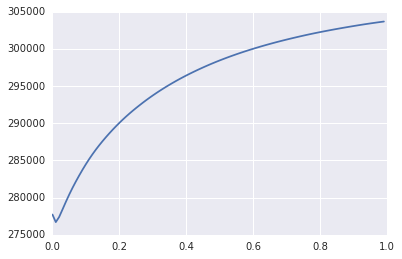

In [116]:
plt.plot(alphalist,SSElist)

In [117]:
optimal_alpha = pd.DataFrame(SSElist,alphalist).sort_values(0).index[0]

In [118]:
model = smf.OLS(ENDF_train_Y,ENDF_train_X).fit_regularized(alpha=optimal_alpha,L1_wt=0.5,maxiter=1000)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     dom_gross_adj_2015   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     52.39
Date:                Thu, 28 Apr 2016   Prob (F-statistic):          1.77e-174
Time:                        14:59:17   Log-Likelihood:                -3762.2
No. Observations:                 732   AIC:                             7600.
Df Residuals:                     694   BIC:                             7775.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
runtime                       0.3656      0.126      2.909      0.004         0.119     0.612
budget                        0.2520      0.056      4.483      0.000         0.142     0.362
in_release_days               0.5402      0.055      9.852      0.000         0.433     0.648
max_no_theaters              -0.0405      0.007     -5.514      0.000        -0.055    -0.026
month_genre_density_count    -2.0677      1.166     -1.773      0.077        -4.357     0.221
theater_squared            1.821e-05   1.84e-06      9.873      0.000      1.46e-05  2.18e-05
Action                        5.4436      7.958      0.684      0.494       -10.182    21.069
Adventure/Fantasy           -19.8477      9.711     -2.044      0.041       -38.915    -0.780
Animation                   -11.6519      9.680     -1.204      0.229       -30.657     7.353
Comedy                       11.3612      7.787      1.459      0.145        -3.929    26.651
Drama                         0.9543      7.518      0.127      0.899       -13.806    15.715
Family                      -19.5380     10.779     -1.813      0.070       -40.701     1.625
Horror                        8.5140      8.352      1.019      0.308        -7.884    24.912
Romance                       5.7072      9.178      0.622      0.534       -12.313    23.728
Sci-Fi                       -6.7283      8.367     -0.804      0.422       -23.156     9.700
Thriller                      7.6471      8.710      0.878      0.380        -9.455    24.749
Buena                         0.7305      8.025      0.091      0.927       -15.027    16.488
Focus                         1.7460     10.196      0.171      0.864       -18.273    21.765
Fox                         -29.2557      6.657     -4.394      0.000       -42.327   -16.185
Lionsgate                     6.3490      7.446      0.853      0.394        -8.271    20.969
Paramount                     1.8745      7.490      0.250      0.802       -12.831    16.580
Relativity                  -15.3384     10.034     -1.529      0.127       -35.039     4.362
Sony                         -7.5002      6.128     -1.224      0.221       -19.532     4.532
Universal                     7.3011      6.935      1.053      0.293        -6.315    20.917
Warner                      -14.5705      6.243     -2.334      0.020       -26.827    -2.314
Weinstein                   -20.3150     10.455     -1.943      0.052       -40.842     0.212
April                       -10.6215      8.238     -1.289      0.198       -26.796     5.553
August                       -2.3286      7.769     -0.300      0.764       -17.582    12.925
December                     -0.6834      8.553     -0.080      0.936       -17.476    16.110
February                     -3.5446      8.395     -0.422      0.673      

##Test set Adj. RSquare
ENDF_test_X = ENDF_test.iloc[:,1:]
ENDF_test_Y = ENDF_test.iloc[:,0]
x_test = np.array(ENDF_test_X)
y_test = np.array(ENDF_test_Y)
y_pred = model.predict(x_test)
y_actual = np.array(y_test)
print("R-squared: ",r2_score(y_actual,y_pred))
print("Adj. R-squared: ",1-(1-r2_score(y_actual,y_pred))*(ENDF_test_X.shape[0]-1)/(ENDF_test_X.shape[0]-ENDF_test_X.shape[1]))

# Appendix: OMDB Data (not used)

In [153]:
title_list = np.array(masterDF['title'])
year_list = np.array(masterDF['release_year'])

In [174]:
from bs4 import BeautifulSoup
import requests
import json
from collections import defaultdict
import time
omdbdict = defaultdict(list)
count = 0
for title,year in zip(title_list,year_list):
    title = re.sub('[^a-z0-9 ]','',title.lower()).replace(' ','+')
    year = str(int(year))
    url = "http://www.omdbapi.com/?t="+title+"&y="+year+"&plot=short&r=json&tomatoes=true"
    count += 1
    if (count == 200) | (count == 400):
        time.sleep(60)
    response = requests.get(url,headers={'Microsoft Edge':'Metis data science student scraping project'})
    soup = BeautifulSoup(response.text)
    newdict = json.loads(soup.text)
    for k,v in newdict.items():
        omdbdict[k].append(v.replace(',',' ').split()[0])        

C:\Users\kennd\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [180]:
OMDBDF = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in omdbdict.items()]))

OMDBDF = OMDBDF.drop(['Production','Website','Rated','DVD','Runtime','Awards','Director','Writer','Language','tomatoConsensus','Actors','Poster','Released','Plot','Error','Genre','tomatoImage','tomatoURL'],axis=1)

OMDBDF